<a href="https://colab.research.google.com/github/jha-mona/ml-pca-project/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task
  How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.


Note : Use KNN for Classification

Data Link : [Wine Data](https://colab.research.google.com/drive/19AtHlobDsFzsOSXKl8K9qlsqNu2McXza#scrollTo=HgJ-b41rjVas&line=1&uniqifier=1)

In [93]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)


In [94]:
wine.head(10)

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   
6  white            6.2              0.32         0.16             7.0   
7  white            7.0              0.27         0.36            20.7   
8  white            6.3              0.30         0.34             1.6   
9  white            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   
5      0.050                 30.0                  97.0   0.9951  3.26   
6      0.045                 30.0                 136.0   0.9949  3.18   
7      0.045                 45.0                 170.0   1.0010  3.00   
8      0.049                 14.0                 132.0   0.9940  3.30   
9      0.044                 28.0                 129.0   0.9938  3.22   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6  
5       0.44     10.1        6  
6       0.47      9.6        6  
7       0.45      8.8        6  
8       0.49      9.5        6  
9       0.45     11.0        6

In [95]:
wine.type.value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [96]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [97]:
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [98]:
wine.duplicated().sum()

1168

In [99]:
wine_data = wine.dropna()

In [100]:
wine_data.drop_duplicates(inplace=True)

<ipython-input-100-9917219f1cfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data.drop_duplicates(inplace=True)


In [101]:
wine_data.shape

(5295, 13)

In [102]:
wine = wine_data.copy()

In [103]:
wine.shape

(5295, 13)

In [104]:
wine.type.value_counts()

type
white    3942
red      1353
Name: count, dtype: int64

In [105]:
wine['type'] = wine['type'].apply(lambda x : 0 if x  == 'red' else 1)

In [106]:
wine.type.value_counts()

type
1    3942
0    1353
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

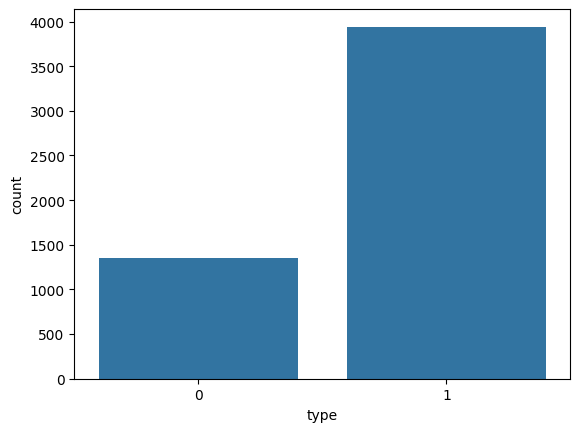

In [107]:
import seaborn as sns
sns.countplot(x='type' , data = wine)

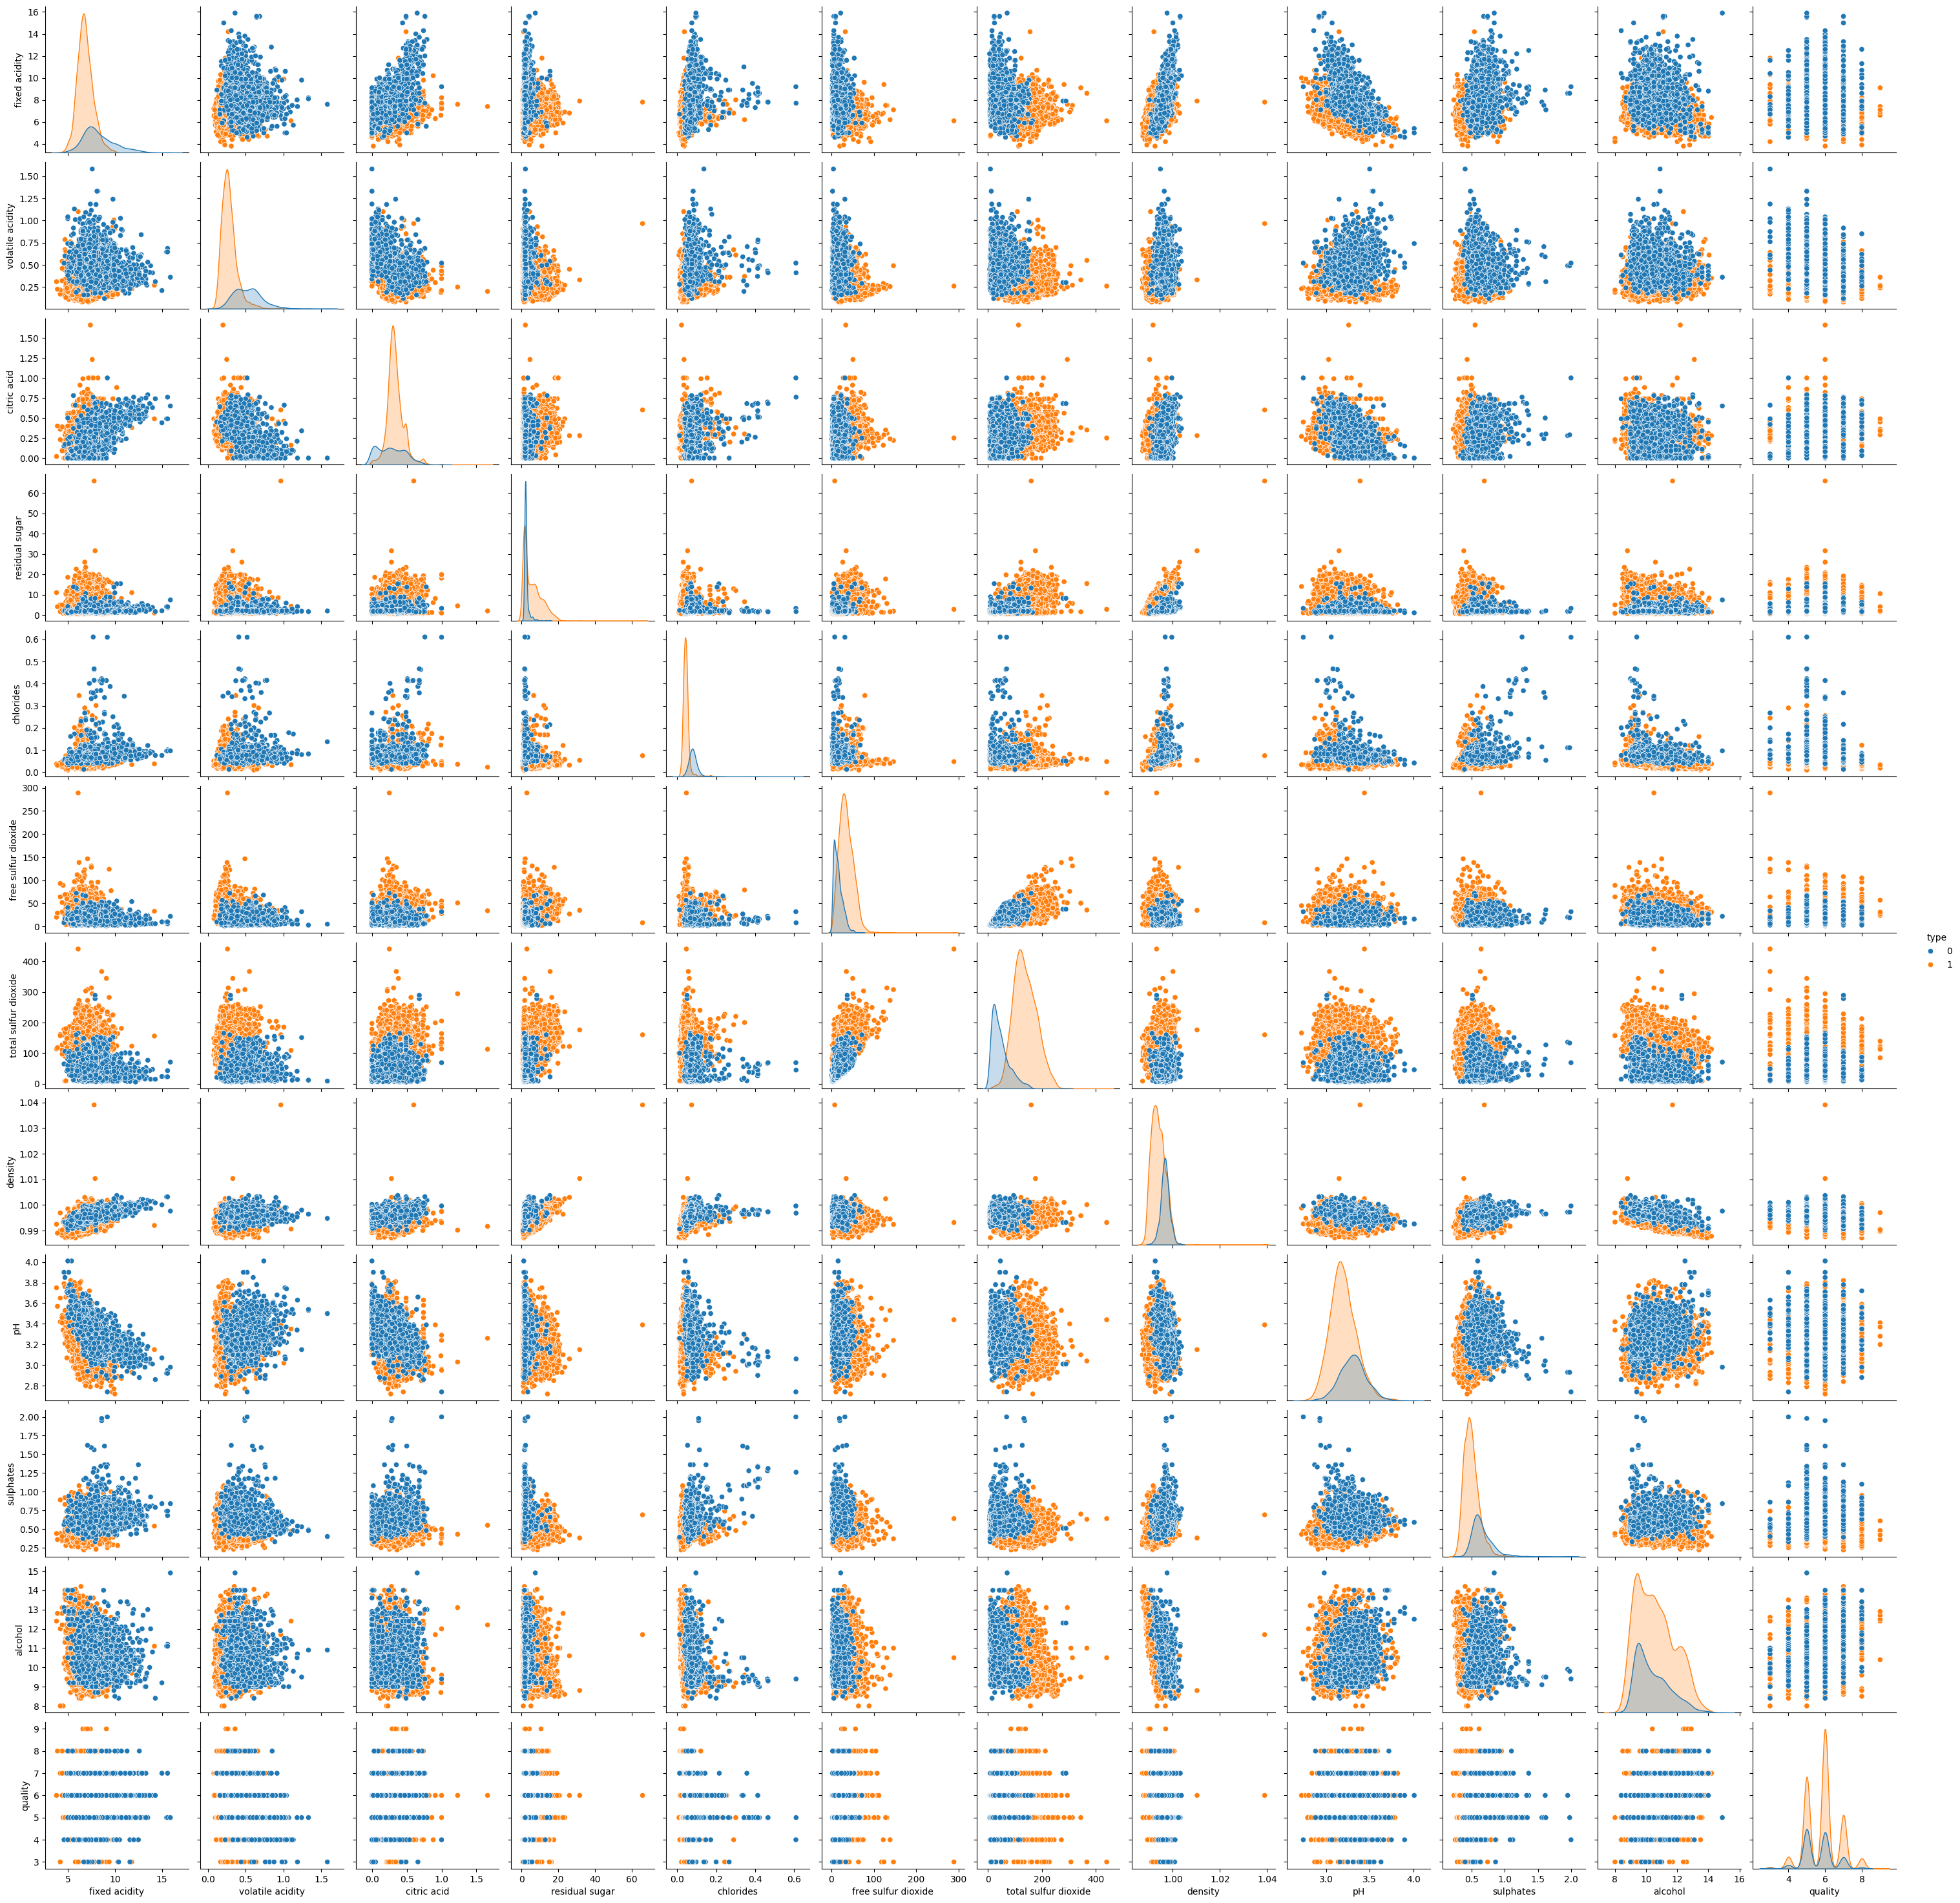

In [108]:
sns.pairplot(wine , hue = 'type')

<Axes: >

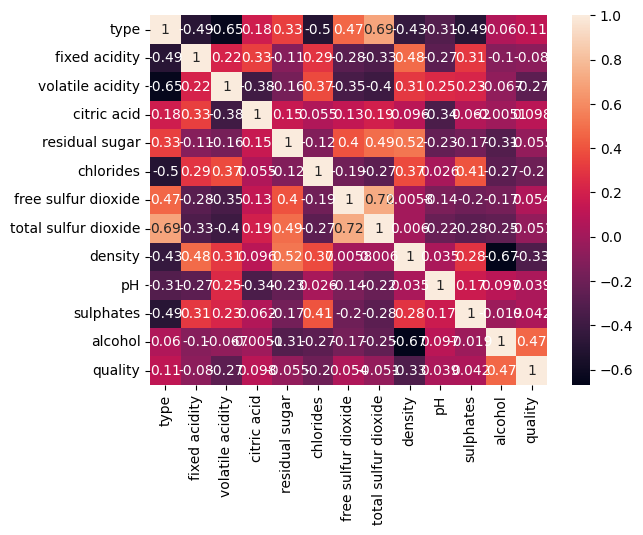

In [109]:
sns.heatmap(wine.corr() , annot = True)

In [110]:
wine_filled = wine.fillna(wine.mean())

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_filled.drop('type', axis=1))


In [112]:
import numpy as np
covarience_matrix = np.cov(wine_scaled.T)

In [113]:
covarience_matrix

array([[ 1.00018889,  0.21656444,  0.32931385, -0.10610422,  0.28995787,
        -0.28207801, -0.32869321,  0.47901051, -0.26967477,  0.30710181,
        -0.10367697, -0.0796138 ],
       [ 0.21656444,  1.00018889, -0.38282182, -0.16446951,  0.36833508,
        -0.3498497 , -0.40130643,  0.30847434,  0.24537583,  0.22657968,
        -0.06679364, -0.26526413],
       [ 0.32931385, -0.38282182,  1.00018889,  0.14655559,  0.05527619,
         0.13082668,  0.19426742,  0.09584239, -0.34271315,  0.06213262,
        -0.00512536,  0.09794468],
       [-0.10610422, -0.16446951,  0.14655559,  1.00018889, -0.12313831,
         0.39965482,  0.48762594,  0.5202925 , -0.23336265, -0.17469636,
        -0.30536825, -0.0546352 ],
       [ 0.28995787,  0.36833508,  0.05527619, -0.12313831,  1.00018889,
        -0.18734694, -0.27005976,  0.37219668,  0.02596771,  0.40584754,
        -0.27024659, -0.20205438],
       [-0.28207801, -0.3498497 ,  0.13082668,  0.39965482, -0.18734694,
         1.00018889,  

In [114]:
eigen_values, eigen_vectors = np.linalg.eig(covarience_matrix)

In [115]:
eigen_values

array([3.01773168, 2.63154925, 1.67565455, 1.06979257, 0.03493596,
       0.84725533, 0.22556773, 0.30313751, 0.66273452, 0.47571591,
       0.54706418, 0.51112753])

In [116]:
 eigen_vectors

array([[-2.99273612e-01, -2.07602486e-01,  4.58495203e-01,
         1.45033298e-01, -3.45507799e-01,  2.09207315e-01,
         2.92608104e-01, -2.83909032e-01, -2.13720941e-02,
         3.91291960e-01, -3.84610549e-01, -7.22868254e-02],
       [-4.03342877e-01, -3.55904215e-02, -2.82843380e-01,
         6.75209113e-02, -8.44550899e-02,  1.79412545e-01,
        -1.54788212e-01,  4.95252170e-01,  4.48994665e-01,
        -4.08215738e-02, -2.79474800e-01, -4.01950239e-01],
       [ 1.19282983e-01, -1.76997139e-01,  5.86504176e-01,
        -5.62429128e-02, -2.40055359e-04, -1.67305434e-01,
        -2.48426076e-01,  3.38484181e-01, -3.45789927e-01,
        -2.09267878e-01,  4.88966139e-02, -4.87093780e-01],
       [ 2.47505036e-01, -3.91277675e-01, -7.49633239e-02,
        -1.43994524e-01, -4.35646877e-01,  5.25344118e-01,
        -1.46827943e-02, -1.74869088e-01,  1.21242536e-01,
        -4.47872969e-01,  2.14580407e-01, -3.72154348e-02],
       [-3.49435841e-01, -2.05582386e-01,  5.5966233

In [117]:
pc = eigen_vectors[0:3]

In [118]:
transformed_data = wine_scaled.dot(pc.T)
new_data = pd.DataFrame(transformed_data , columns =['pc1','pc2','pc3'])
new_data['target'] = wine['type'].values

In [119]:
new_data.head()

pc1       pc2       pc3  target
0  1.091584  1.053722  0.794896       1
1  0.445156  0.293006 -0.156706       1
2 -0.007148 -0.090579  0.509224       1
3  0.565873  0.228058 -0.151640       1
4  0.147266  0.701326 -0.745816       1

In [120]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(new_data.drop('target' , axis =1) , new_data['target'] , test_size = 0.2 , random_state =40)

In [121]:
X_train.shape

(4236, 3)

In [122]:
X_test.shape

(1059, 3)

In [130]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , y_train)
y_predict = knn.predict(X_test)

In [131]:
y_predict

array([1, 0, 0, ..., 1, 1, 0])

In [132]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
print(recall_score(y_test , y_predict , average ='micro'))
print(precision_score(y_test , y_predict ,  average ='micro'))
print(f1_score(y_test, y_predict , average ='micro'))
k = accuracy_score(y_test , y_predict)
k

0.9084041548630784
0.9084041548630784
0.9084041548630784


0.9084041548630784

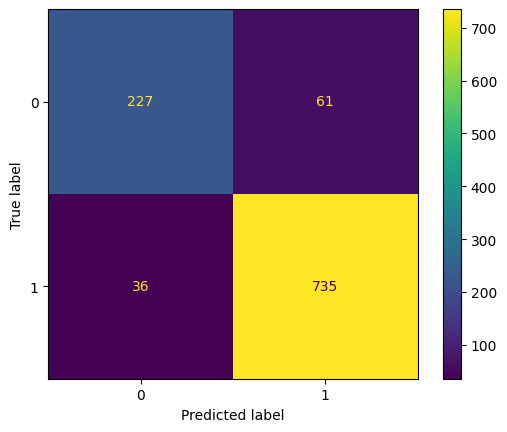

In [133]:
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
confusion_matrix(y_test , y_predict)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [135]:
knn.fit(X_train_pca , y_train)
y_pca = knn.predict(X_test_pca)

In [136]:
accuracy_score(y_test , y_pca)

0.9084041548630784

In [138]:
print(recall_score(y_test, y_pca, average='weighted'))
print(precision_score(y_test, y_predict, average='weighted'))
print(f1_score(y_test, y_predict, average='weighted'))

0.9084041548630784
0.9069818469440883
0.907056871646233
